In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import re
from io import StringIO

In [33]:
columns = [
    'EPOCH_TIME', 'MAG_AVG_B', 'BX_GSE', 'BY_GSM', 'BZ_GSM',
    'FLOW_SPEED_GSE', 'PROTON_DENSITY', 'TEMPERATURE', 'FLOW_PRESSURE'
]

In [34]:
# Read and clean the CSV data
cleaned_data = []
with open('OMNI_HRO_1MIN_1877064.csv', 'r') as csvfile:
    for row in csvfile:
        # Skip comment lines starting with '#'
        if not row.startswith('#'):
            # Remove multiple commas and strip whitespace
            clean_row = re.sub(r',+', ',', row).strip()
            cleaned_data.append(clean_row)

In [35]:
cleaned_data_str = '\n'.join(cleaned_data)

In [36]:
data = pd.read_csv(StringIO(cleaned_data_str), names=columns, skiprows=1)

In [37]:
data['Datetime'] = pd.to_datetime(data['EPOCH_TIME'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [38]:
# Plot the parameters
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

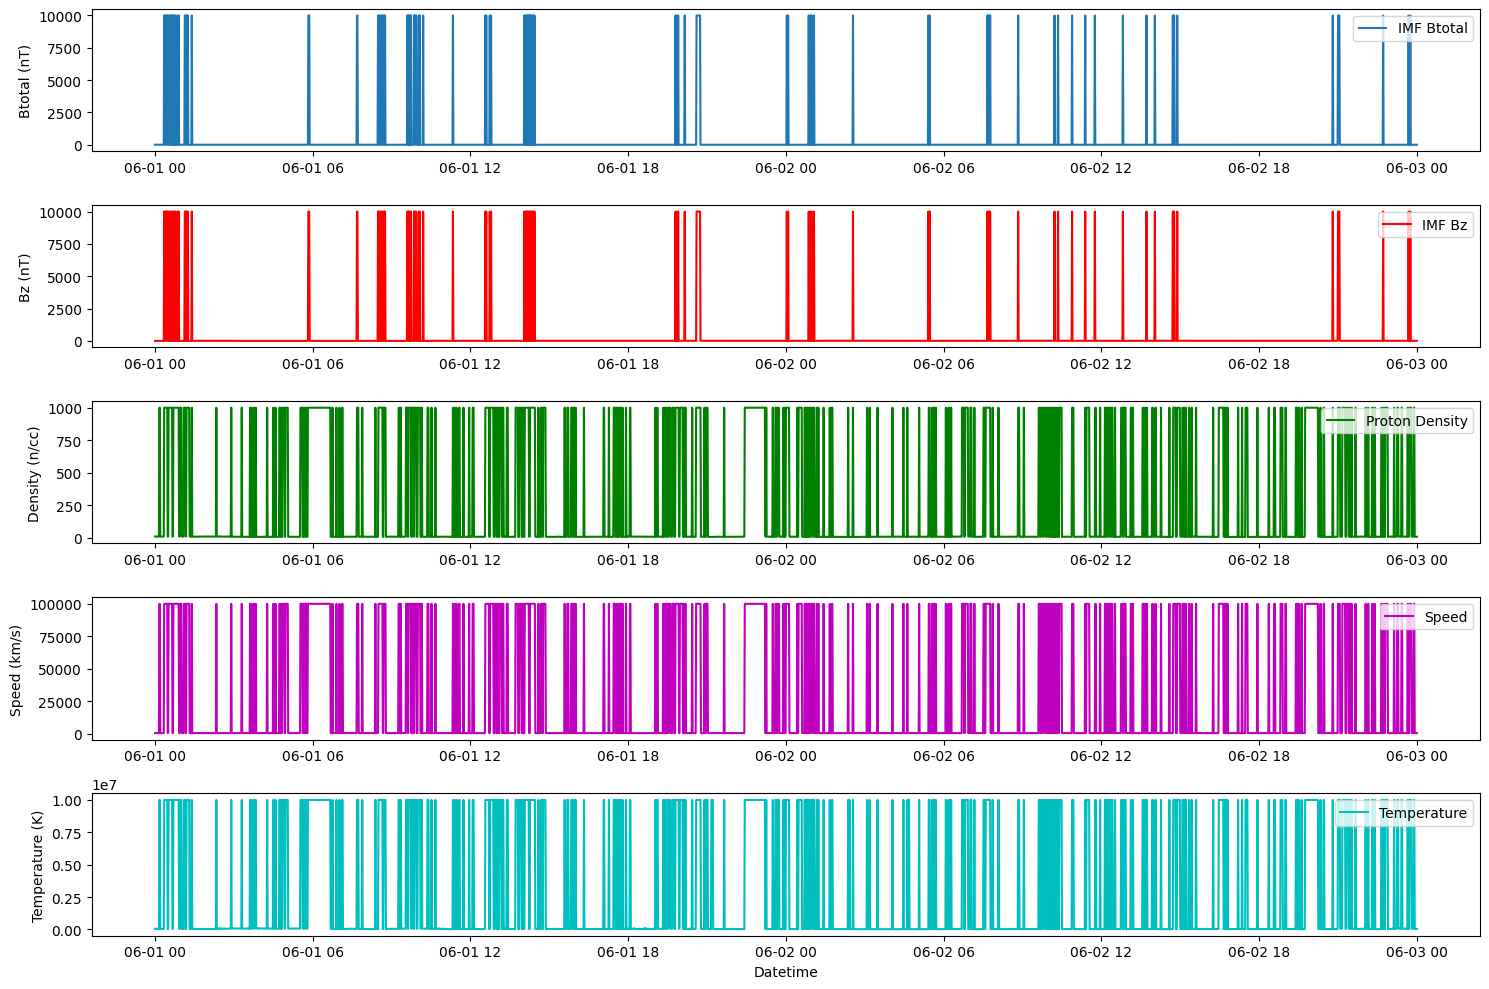

In [40]:
# Plot the parameters
plt.figure(figsize=(15, 10))

# IMF Btotal (MAG_AVG_B)
plt.subplot(5, 1, 1)
plt.plot(data['Datetime'], data['MAG_AVG_B'], label='IMF Btotal')
plt.ylabel('Btotal (nT)')
plt.legend()

# IMF Bz (BZ_GSM)
plt.subplot(5, 1, 2)
plt.plot(data['Datetime'], data['BZ_GSM'], label='IMF Bz', color='r')
plt.ylabel('Bz (nT)')
plt.legend()

# Proton Density (PROTON_DENSITY)
plt.subplot(5, 1, 3)
plt.plot(data['Datetime'], data['PROTON_DENSITY'], label='Proton Density', color='g')
plt.ylabel('Density (n/cc)')
plt.legend()

# Speed (FLOW_SPEED_GSE)
plt.subplot(5, 1, 4)
plt.plot(data['Datetime'], data['FLOW_SPEED_GSE'], label='Speed', color='m')
plt.ylabel('Speed (km/s)')
plt.legend()

# Temperature (TEMPERATURE)
plt.subplot(5, 1, 5)
plt.plot(data['Datetime'], data['TEMPERATURE'], label='Temperature', color='c')
plt.ylabel('Temperature (K)')
plt.xlabel('Datetime')
plt.legend()

plt.tight_layout()
plt.show()